In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Why Should I Take the ACT?

In [2]:
colleges = pd.read_csv('../data/sat_act_by_college.csv')

# CA Performance on Both Tests

In [3]:
ca_sat = pd.read_csv('../data/SAT_2019_ca.csv')
ca_act = pd.read_csv('../data/act_2019_ca.csv')

In [4]:
ca_sat.info()
ca_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CDS                    2579 non-null   float64
 1   CCode                  2579 non-null   float64
 2   CDCode                 2579 non-null   float64
 3   SCode                  2579 non-null   float64
 4   RType                  2579 non-null   object 
 5   SName                  1982 non-null   object 
 6   DName                  2521 non-null   object 
 7   CName                  2579 non-null   object 
 8   Enroll12               2579 non-null   float64
 9   NumTSTTakr12           2579 non-null   float64
 10  NumERWBenchmark12      2304 non-null   object 
 11  PctERWBenchmark12      2304 non-null   object 
 12  NumMathBenchmark12     2304 non-null   object 
 13  PctMathBenchmark12     2304 non-null   object 
 14  Enroll11               2579 non-null   float64
 15  NumT

In [5]:
ca_sat = ca_sat[['SCode','Enroll12','NumTSTTakr12','TotNumBothBenchmark12','PctBothBenchmark12']]

In [6]:
ca_act = ca_act[['SCode','Enroll12','NumTstTakr','NumGE21','PctGE21']]

In [7]:
ca = pd.merge(ca_sat,ca_act,how='left',on='SCode',suffixes=['sat','act'])

In [8]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37786 entries, 0 to 37785
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  37263 non-null  float64
 1   Enroll12sat            37263 non-null  float64
 2   NumTSTTakr12           37263 non-null  float64
 3   TotNumBothBenchmark12  34726 non-null  object 
 4   PctBothBenchmark12     34726 non-null  object 
 5   Enroll12act            37523 non-null  float64
 6   NumTstTakr             37523 non-null  float64
 7   NumGE21                36570 non-null  object 
 8   PctGE21                36570 non-null  object 
dtypes: float64(5), object(4)
memory usage: 2.9+ MB


In [9]:
ca.dropna(subset=['SCode'],axis=0)

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
0,630046.0,18.0,0.0,NaN,NaN,18.0,0.0,NaN,NaN
1,634758.0,29.0,10.0,*,*,29.0,0.0,NaN,NaN
2,1930924.0,206.0,102.0,14,13.73,206.0,31.0,4,12.90
3,1931476.0,227.0,113.0,18,15.93,227.0,32.0,9,28.13
4,1931856.0,18.0,14.0,*,*,18.0,1.0,*,*
...,...,...,...,...,...,...,...,...,...
37258,0.0,4447.0,2256.0,1248,55.32,4447.0,1078.0,565,52.41
37259,0.0,4447.0,2256.0,1248,55.32,4559.0,594.0,180,30.30
37260,0.0,4447.0,2256.0,1248,55.32,1869.0,76.0,57,75.00
37261,0.0,4447.0,2256.0,1248,55.32,114618.0,20678.0,9182,44.40


In [10]:
ca = ca[ca['SCode'] != 0]

In [11]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 37785
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  1981 non-null   float64
 1   Enroll12sat            1981 non-null   float64
 2   NumTSTTakr12           1981 non-null   float64
 3   TotNumBothBenchmark12  1745 non-null   object 
 4   PctBothBenchmark12     1745 non-null   object 
 5   Enroll12act            2241 non-null   float64
 6   NumTstTakr             2241 non-null   float64
 7   NumGE21                1886 non-null   object 
 8   PctGE21                1886 non-null   object 
dtypes: float64(5), object(4)
memory usage: 195.6+ KB


In [12]:
ca.dropna(how='any',axis=0,inplace=True)
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 2 to 1980
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  1408 non-null   float64
 1   Enroll12sat            1408 non-null   float64
 2   NumTSTTakr12           1408 non-null   float64
 3   TotNumBothBenchmark12  1408 non-null   object 
 4   PctBothBenchmark12     1408 non-null   object 
 5   Enroll12act            1408 non-null   float64
 6   NumTstTakr             1408 non-null   float64
 7   NumGE21                1408 non-null   object 
 8   PctGE21                1408 non-null   object 
dtypes: float64(5), object(4)
memory usage: 110.0+ KB


In [28]:
ca['TotNumBothBenchmark12'] = pd.to_numeric(ca['TotNumBothBenchmark12'],errors='coerce')
ca['PctBothBenchmark12'] = pd.to_numeric(ca['PctBothBenchmark12'],errors='coerce')
ca['NumGE21'] = pd.to_numeric(ca['NumGE21'],errors='coerce')
ca['PctGE21'] = pd.to_numeric(ca['PctGE21'],errors='coerce').astype('str').astype('float')

In [29]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 2 to 1980
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SCode                  1408 non-null   float64
 1   Enroll12sat            1408 non-null   float64
 2   NumTSTTakr12           1408 non-null   float64
 3   TotNumBothBenchmark12  1215 non-null   float64
 4   PctBothBenchmark12     1215 non-null   float64
 5   Enroll12act            1408 non-null   float64
 6   NumTstTakr             1408 non-null   float64
 7   NumGE21                1009 non-null   float64
 8   PctGE21                1009 non-null   float64
dtypes: float64(9)
memory usage: 110.0 KB


In [30]:
ca.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,1.408000e+03,1408.000000,1408.000000,1215.000000,1215.000000,1408.000000,1408.000000,1009.000000,1009.000000
mean,2.130154e+06,299.460227,118.544034,62.701235,42.968749,299.460227,58.503551,43.947473,51.541556
std,1.811919e+06,218.889567,108.528247,61.626035,23.348236,218.889567,65.601498,50.174974,26.394866
min,1.000650e+05,3.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000
25%,1.267415e+05,100.000000,38.000000,16.000000,23.485000,100.000000,12.000000,12.000000,28.570000
50%,1.935783e+06,268.000000,92.000000,41.000000,40.590000,268.000000,38.000000,25.000000,52.940000
75%,3.634247e+06,471.000000,173.000000,90.000000,61.540000,471.000000,84.000000,55.000000,75.000000
max,6.120893e+06,1135.000000,932.000000,385.000000,100.000000,1135.000000,512.000000,392.000000,100.000000


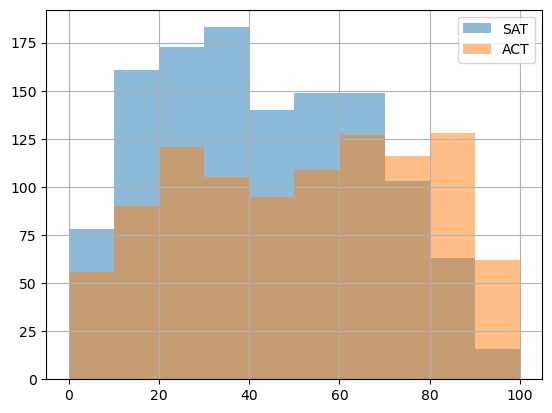

In [37]:
ca['PctBothBenchmark12'].hist(alpha=0.5,label='SAT')
ca['PctGE21'].hist(alpha=0.5,label='ACT')
plt.legend()

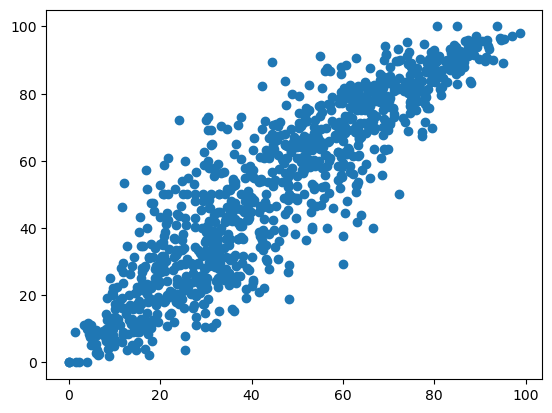

In [32]:
plt.scatter(x=ca['PctBothBenchmark12'],y=ca['PctGE21'])

# Schools that Focus on ACT

In [38]:
ca_act_schools = ca[ca['NumGE21'] > ca['NumTSTTakr12']]

In [39]:
ca_act_schools.describe()

,SCode,Enroll12sat,NumTSTTakr12,TotNumBothBenchmark12,PctBothBenchmark12,Enroll12act,NumTstTakr,NumGE21,PctGE21
count,4.400000e+01,44.000000,44.000000,36.000000,36.000000,44.000000,44.000000,44.000000,44.000000
mean,2.144392e+06,379.863636,113.931818,114.500000,79.310556,379.863636,179.681818,146.068182,73.312500
std,1.818546e+06,235.432960,80.112827,61.578521,14.729897,235.432960,93.923465,97.969477,27.432443
min,1.016830e+05,18.000000,1.000000,8.000000,27.590000,18.000000,15.000000,4.000000,12.120000
25%,1.310158e+05,149.000000,29.750000,74.500000,77.950000,149.000000,119.000000,55.500000,60.495000
50%,2.265980e+06,397.000000,119.500000,117.000000,81.610000,397.000000,168.500000,150.000000,87.675000
75%,3.730276e+06,586.500000,180.000000,159.000000,88.345000,586.500000,239.750000,206.250000,91.882500
max,5.337456e+06,808.000000,270.000000,244.000000,96.950000,808.000000,409.000000,392.000000,97.300000


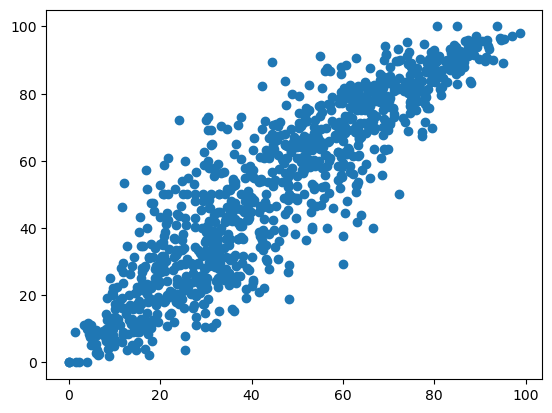

In [40]:
plt.scatter(x=ca['PctBothBenchmark12'],y=ca['PctGE21'])